26.06.23


### Basic idea of the Thesis

The assumptions are the following:
* observed data points
* no hidden confounding  
* True causal graph =DAG (<font color='red'>\\( \times\\)</font>)(which means this assumption does not hold, we want to dig deeper about how the counterfactual items would be affected if there is error in causal graph $g$ )


Assume that \\( \tilde{g} \ne g\\),to train the model(CNF),and the $g$ is the Simpson[NLIN]
* Case1:remove edges
* Case2:change the direction of existing edges
* Case2:add edges(more complicated)

Then check how the couterfactual item would be affected by the interventions in two situations for each case

####  To do List

* how to count the couterfactual items
* how to draw causal graph inside a jupyter notebook (fail to draw so far, try another method)
* draw the framework of two model with different causal graph
* try the counterfacutual one in the original graph
* calculate the first case which is removing

In [1]:
!pip install networkx matplotlib


### Causal graph of Simpon

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

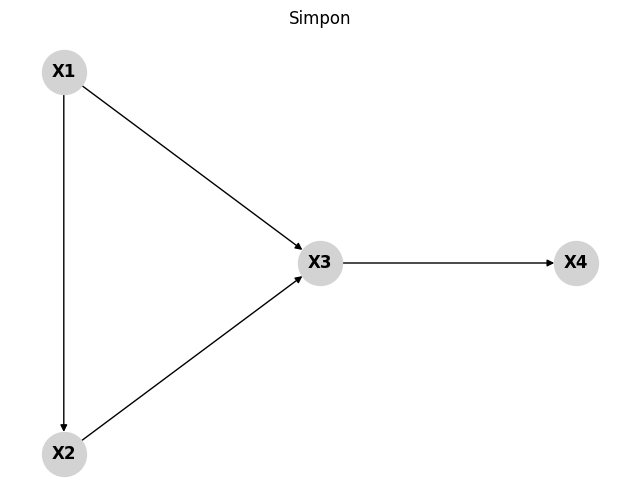

In [3]:
G = nx.DiGraph()
G.add_nodes_from(['X1', 'X2', 'X3', 'X4'])
G.add_edges_from([('X1', 'X2'), ('X1', 'X3'), ('X2', 'X3'),('X3','X4')])

plt.figure(figsize=(8, 6))
#bipartite_layout(G, nodes, align='vertical', scale=1, center=None, aspect_ratio=1.3333333333333333)[source]

pos = {'X2': np.array([-1.  , -0.75]),
 'X1': np.array([-1.  ,  0.75]),
 'X3': np.array([ 1.  , 0.]),
 'X4': np.array([3 , 0])} 
nx.draw_networkx(G, pos, with_labels=True, node_size=1000, node_color='lightgrey', font_size=12, font_weight='bold', arrows=True)
plt.title('Simpon')
plt.axis('off')  # Disable axis
plt.show()

### Draw the framework of two model with different causal graph

27.06

#### To do List 


* Online presentation about the based paper
* IMPORTANT: sumary the content and take a note about the presentation to inspire yourself. (What is understandable and which part is hard to get) 

29.06

#### * How to calculate the distributions over counterfactuals

(<font color='red'>it is not necessary to be a distribution, so far I need more about how to obtain the exact value instead of a distribution. Start from one data point</font>)
* statements about a world in which a hypothetical intervention was performed all else being equal.For example,given observation $x^F$,we can ask what would have happen if $X_I$ had instead taken the value $\theta$. We denote the counterfactual variable by $X(do(X_I = \theta))|X^F$,whose distribution can be computed in three steps:
1. Abduction:compute the posterior distribution over background variables given $X^F$,$P_{U|x^F}$;
2. Action: perform the intervention to obtain the new structural equations$S^{do(X_I = \theta)}$;
3. Prediction:$ P_{X(do(X_I = \theta))|x^F}$ is the disstribution induced by the resulting $ SCM(S^{do(X_I = \theta)},P_{U|x^F})$.


#### Summary for Causal normalizing flows: from theory to practice

We aim at learning the full causal-generating process using a single DNN and, in particular, using a causal normalizing flow.
* theoretically demonstrate that causal NFs are a natural choice to approximate a broad  **class of causal data-generating processes(section3)**
* design causal NFs that inherently satisfy the necessary conditions to capture the underlying causal dependencies(section4)
* introduce an implementation of the do-operator that allows us to efficiently solve causal inference tasks(section5)

03.07

Recording for the meeting

1. What is the intervention, from the book and the paper 
2. Do the for loop for 100 data points for the real case and the remove case (remove every edge. The professor says that linear model is so easy, since there are just some blocks?
3. Do the code part and calculation automatically

Algorithm 1

For i = 1,...,n(100)

$\bar{U}\sim \mathcal{N} (\mu, \Sigma)$

generate ($u^i_1,u^i_2,u^i_3,u^i_4$)

$obs.data\left\{\begin{matrix}
 x_1^{F(i)} =f_1(u_1^i)\\
  .\\
  .\\
 x_4^{F(i)} =f_4(u_4^i)
\end{matrix}\right.$

For do($x_j =\alpha),i = 1,..,4 , \alpha =[some \space reasonable \space region]$ 

Under true SCM

$$x_1^{CF(i)} \\ ...\\ x_4^{CF(i)}$$

Under wrong model(remove)

$$\tilde{x_1^{CF(i)}}\\ ...\\ \tilde{x_4^{CF(i)}}$$

end

$\frac{1}{n}\sum_{i}^{n}( x_1^{CF(i)}-\tilde{x_1^{CF(i)}})^2$


17.07

**Next step:**
1) different representation to modify the code
2) read the paper
3) close form ?

**What is the difference between correlation and causality even in linear case?**

Basically, correlation does not have directions. In linear case, we can have two causal graph $x1  \to x2$, then $p(x1|x2) \neq p(x1|do(x2=\alpha)) = p(x1)$; $x2 \to x1$ then $p(x1|x2) = p(x1|do(x2=\alpha))$

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

## Real 

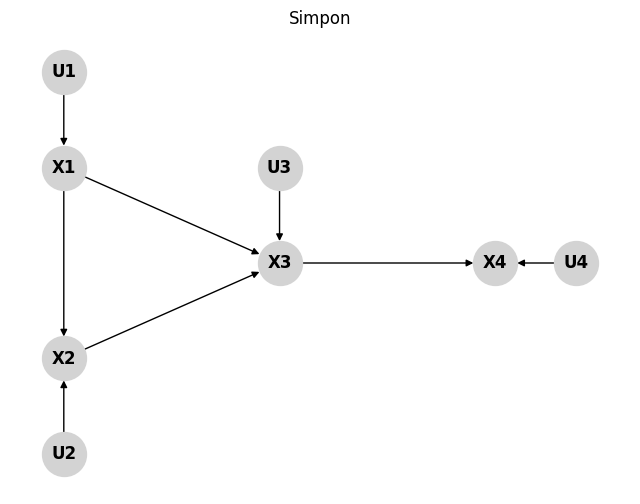

In [4]:
G = nx.DiGraph()
G.add_nodes_from(['X1', 'X2', 'X3', 'X4','U1','U2','U3','U4'])
G.add_edges_from([('U1','X1'),('U2','X2'),('U3','X3'),('U4','X4'),('X1', 'X2'), ('X1', 'X3'), ('X2', 'X3'),('X3','X4')])

plt.figure(figsize=(8, 6))
#bipartite_layout(G, nodes, align='vertical', scale=1, center=None, aspect_ratio=1.3333333333333333)[source]

pos = {'U1':np.array([-1.  , 1.5]),
       'U2':np.array([-1.  , -1.5]),
    'X2': np.array([-1.  , -0.75]),
 'X1': np.array([-1.  ,  0.75]),
 'X3': np.array([ 1.  , 0.]),
 'U3': np.array([ 1.  , 0.75]),
 'U4': np.array([ 3.75  , 0.]),
 'X4': np.array([3 , 0])} 
nx.draw_networkx(G, pos, with_labels=True, node_size=1000, node_color='lightgrey', font_size=12, font_weight='bold', arrows=True)
plt.title('Simpon')
plt.axis('off')  # Disable axis
plt.show()

## Remove X1 to X3

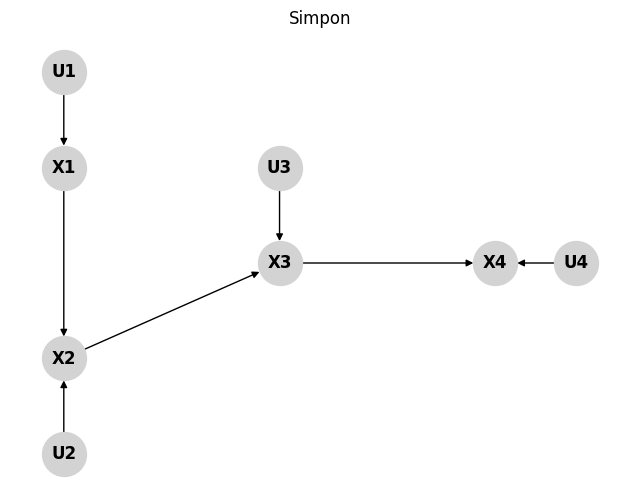

In [6]:
G = nx.DiGraph()
G.add_nodes_from(['X1', 'X2', 'X3', 'X4','U1','U2','U3','U4'])
G.add_edges_from([('U1','X1'),('U2','X2'),('U3','X3'),('U4','X4'),('X1', 'X2'), ('X2', 'X3'),('X3','X4')])

plt.figure(figsize=(8, 6))
#bipartite_layout(G, nodes, align='vertical', scale=1, center=None, aspect_ratio=1.3333333333333333)[source]

pos = {'U1':np.array([-1.  , 1.5]),
       'U2':np.array([-1.  , -1.5]),
    'X2': np.array([-1.  , -0.75]),
 'X1': np.array([-1.  ,  0.75]),
 'X3': np.array([ 1.  , 0.]),
 'U3': np.array([ 1.  , 0.75]),
 'U4': np.array([ 3.75  , 0.]),
 'X4': np.array([3 , 0])} 
nx.draw_networkx(G, pos, with_labels=True, node_size=1000, node_color='lightgrey', font_size=12, font_weight='bold', arrows=True)
plt.title('Simpon')
plt.axis('off')  # Disable axis
plt.show()

For linear model, removing the edge from x1 to x3 does not effect the counterfactual x3 when we do intervention on x2. Because in linear model,the exogenous variables can catch every error (based on our assumption). And x1 is not effected when we do intervention on x2

**In linear case, how big the error when removing some edge?**

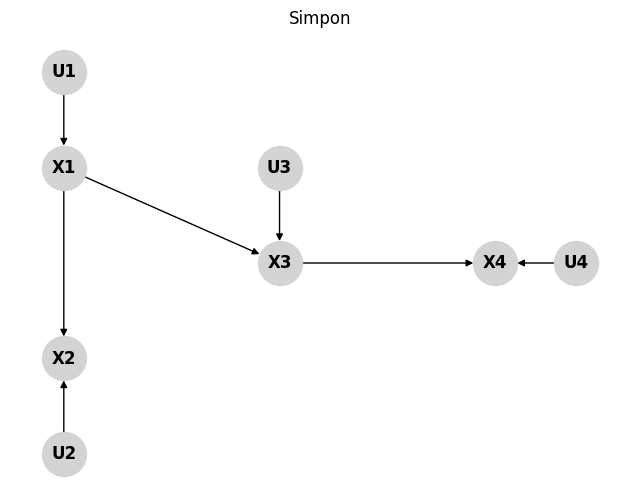

In [7]:
G = nx.DiGraph()
G.add_nodes_from(['X1', 'X2', 'X3', 'X4','U1','U2','U3','U4'])
G.add_edges_from([('U1','X1'),('U2','X2'),('U3','X3'),('U4','X4'),('X1', 'X2'), ('X1', 'X3'),('X3','X4')])

plt.figure(figsize=(8, 6))
#bipartite_layout(G, nodes, align='vertical', scale=1, center=None, aspect_ratio=1.3333333333333333)[source]

pos = {'U1':np.array([-1.  , 1.5]),
       'U2':np.array([-1.  , -1.5]),
    'X2': np.array([-1.  , -0.75]),
 'X1': np.array([-1.  ,  0.75]),
 'X3': np.array([ 1.  , 0.]),
 'U3': np.array([ 1.  , 0.75]),
 'U4': np.array([ 3.75  , 0.]),
 'X4': np.array([3 , 0])} 
nx.draw_networkx(G, pos, with_labels=True, node_size=1000, node_color='lightgrey', font_size=12, font_weight='bold', arrows=True)
plt.title('Simpon')
plt.axis('off')  # Disable axis
plt.show()

In linear case, how big the error. The error would be affected by the size of parameters. If, we remove the edge between x2 to x3.

In this case, if we do intervention on x2,x3 will have an error. And if we set the parameter for x4 bigger than 1 ,like $x4 = 2x3 + u4$then, the error will be amplified. Accordingly,if the parameter of x4 is less than 1,like $x4 = 0.5x3 + u4$, then the error will be diminished.

**Intuition Understanding about the Paper**

Normalizing flow is something change from a distribution to another and generate some data. And it comes from the formula here https://en.wikipedia.org/wiki/Probability_density_function#Scalar_to_scalar 

So, we learn something which is SCM and match between Gaussian distribution and the observed data based on the formula above and actually an approximation. 

The inputs are observed data points and Adjacency matrix.

There is a formula on notebook writen by hand.

### some matrix product may improve the base model